<a href="https://colab.research.google.com/github/prikshit-2000/Kanto-pokemon-Classification/blob/master/Pokemon_kanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
"""
This code classify the three Pokemons (Pikachu,Bulbasaur,Charmander) 
"""

'\nThis code classify the three Pokemons (Pikachu,Bulbasaur,Charmander) \n'

In [10]:
import os
import zipfile
local_zip = '/Pokemon Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Pokemon Dataset')
zip_ref.close()

In [12]:
# Directory with our training Bulbasaur pictures
train_bulbasaur_dir = os.path.join('/Pokemon Dataset/Pokemon Dataset/Train/Bulbasaur')

# Directory with our training Charmander pictures
train_charmander_dir = os.path.join('/Pokemon Dataset/Pokemon Dataset/Train/Charmander')
# Directory with our training Charmander pictures
train_pikachu_dir = os.path.join('/Pokemon Dataset/Pokemon Dataset/Train/Pikachu')

In [13]:
train_bulbasaur_names = os.listdir(train_bulbasaur_dir)
print(train_bulbasaur_names[:10])

train_charmander_names = os.listdir(train_charmander_dir)
print(train_charmander_names[:10])

train_pikachu_names = os.listdir(train_pikachu_dir)
print(train_pikachu_names[:10])

['439.jpg', '443.jpg', '472.jpg', '449.jpg', '432.jpg', '478.jpg', '481.jpg', '398.jpg', '465.jpg', '421.jpg']
['617.jpg', '520.jpg', '566.jpg', '605.jpg', '583.jpg', '525.jpg', '498.jpg', '606.jpg', '564.jpg', '563.jpg']
['383.jpg', '376.jpg', '297.jpg', '337.jpg', '394.jpg', '306.jpg', '340.jpg', '366.jpg', '391.jpg', '370.jpg']


In [14]:
print('total training bulbasaur images:', len(os.listdir(train_bulbasaur_dir)))
print('total training charmander images:', len(os.listdir(train_charmander_dir)))
print('total training pikachu images:', len(os.listdir(train_pikachu_dir)))



total training bulbasaur images: 101
total training charmander images: 101
total training pikachu images: 101


In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [33]:
# fig = plt.gcf()
# fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index += 8
# next_bulbasaur_pix = [os.path.join(train_bulbasaur_dir, fname) 
#                 for fname in train_bulbasaur_names[pic_index-8:pic_index]]
# next_charmander_pix = [os.path.join(train_charmander_dir, fname) 
#                 for fname in train_charmander_names[pic_index-8:pic_index]]
# next_pikachu_pix = [os.path.join(train_pikachu_dir, fname) 
#                 for fname in train_pikachu_names[pic_index-8:pic_index]]

# for i, img_path in enumerate(next_bulbasaur_pix+next_charmander_pix+next_pikachu_pix):
#   # Set up subplot; subplot indices start at 1
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

In [17]:
import tensorflow as tf
import numpy as np

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/Pokemon Dataset/Pokemon Dataset/Train',  # This is the source directory for training images
        target_size=(300, 300),  
        batch_size=128)

Found 303 images belonging to 3 classes.


In [22]:
history = model.fit(
      train_generator,
      steps_per_epoch=3,  
      epochs=25,
      verbose=1)

Epoch 1/25


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3/3 [==============================] - 4s 1s/step - loss: 0.8840 - accuracy: 0.3366
Epoch 2/25
3/3 [==============================] - 7s 2s/step - loss: 0.5908 - accuracy: 0.5677
Epoch 3/25
3/3 [==============================] - 4s 1s/step - loss: 0.7033 - accuracy: 0.4653
Epoch 4/25
3/3 [==============================] - 4s 1s/step - loss: 0.5975 - accuracy: 0.3696
Epoch 5/25
3/3 [==============================] - 4s 1s/step - loss: 0.3866 - accuracy: 0.8053
Epoch 6/25
3/3 [==============================] - 5s 2s/step - loss: 1.0320 - accuracy: 0.4224
Epoch 7/25
3/3 [==============================] - 7s 2s/step - loss: 0.3673 - accuracy: 0.8086
Epoch 8/25
3/3 [==============================] - 7s 2s/step - loss: 0.2540 - accuracy: 0.8812
Epoch 9/25
3/3 [==============================] - 7s 2s/step - loss: 0.2322 - accuracy: 0.8251
Epoch 10/25
3/3 [==============================] - 5s 2s/step - loss: 0.1835 - accuracy: 0.9043
Epoch 11/25
3/3 [==============================] - 6s 2s/ste

Saving 1104.jpg to 1104 (1).jpg
[0]
Bulbasaur


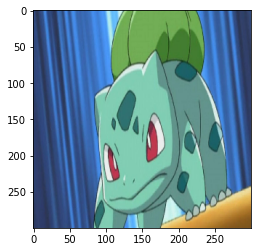

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  pred=np.argmax(classes,axis=1)
  print(pred)
  if pred==0:
    print("Bulbasaur")
  elif pred==1:
    print("Charmander")
  else:
    print("Pikachu")
  plt.imshow(img)
  plt.show()  

